# Ensemble Learning

## Assignment Questions

1. Can we use Bagging for regression problems?

Answer - Yes, Bagging can be used for regression.
In regression, multiple regression models (like Decision Trees) are trained on different bootstrap samples. Each model gives a numerical prediction, and Bagging takes the average of all these predictions.
This helps reduce variance and makes the model more stable.

 2. What is the difference between multiple model training and single model training?

 Answer - Single model training means using only one algorithm to learn from the data. Its performance depends completely on that one model.

Multiple model training (Ensemble learning) trains several models on different parts or views of the data and combines their predictions.
This usually gives better generalization, more accuracy, and reduces overfitting.

3. Explain the concept of feature randomness in Random Forest?

Answer - Random Forest adds randomness by selecting a random subset of features at each split instead of checking all features.

This ensures that all trees are not identical and that each tree learns different patterns from the data.

This randomness improves performance and reduces overfitting.

4. What is OOB (Out-of-Bag) Score?

Answer - OOB score is a built-in validation method used in Bagging and Random Forest.
Since each tree trains on a bootstrap sample, around 37% of data is left out automatically.
This unseen data is used to test the tree’s performance.
The OOB score gives an unbiased estimate without needing a separate test set.

5. How can you measure the importance of features in a Random Forest model?

Answer - Two main methods are used:

1. Gini Importance – Measures how much each feature reduces impurity in splits across all trees.

2. Permutation Importance – Checks how accuracy drops when a feature’s values are randomly shuffled.
Higher drop = more important feature.

6. Explain the working principle of a Bagging Classifier?

Answer - Bagging works by:

1. Creating many different bootstrap samples from the dataset.

2. Training a separate classifier (usually decision trees) on each sample.

3. Making predictions by taking a majority vote across all models.
This reduces variance and improves stability of the model.

7. How do you evaluate a Bagging Classifier’s performance?

Answer - You can evaluate a Bagging Classifier using:

* Accuracy

* Precision, Recall, F1-Score

* Confusion Matrix

* Cross-validation

OOB score (for Bagging and Random Forest)
These metrics help measure how well the ensemble predicts on unseen data.

8. How does a Bagging Regressor work?

Answer - A Bagging Regressor works the same way as Bagging Classifier, but instead of voting, it averages predictions.
Each model predicts a number, and the final answer is the mean of all model outputs.
This averaging makes the model less sensitive to noise.

9. What is the main advantage of ensemble techniques?

Answer - The biggest advantage is high accuracy and robustness.
Ensembles combine multiple models, which smooths out individual model errors, reduces overfitting, and gives more reliable predictions.

10. What is the main challenge of ensemble methods?

Answer - They are computationally expensive and harder to interpret.
Since many models are trained, they require more time, memory, and processing power.
Also, the final model becomes a “black box,” making it difficult to explain decisions.

 11. Explain the key idea behind ensemble techniques?

 Answer - The main idea is:
“Combining many weak or average models gives one strong model.”
Each model captures different patterns, and their collective decision boosts performance.

12. What is a Random Forest Classifier?

Answer - Random Forest is an ensemble of many decision trees.
Each tree is trained on a different bootstrap sample and uses random feature selection.
The final class prediction is made using majority voting across all trees.
It is powerful, stable, and widely used.

13. What are the main types of ensemble techniques?

Answer - Bagging – Reduces variance (Random Forest).

Boosting – Reduces bias by learning from previous mistakes (AdaBoost, XGBoost).

Stacking – Combines different models using a meta-learner.

14. What is ensemble learning in machine learning?

Answer - Ensemble learning is a method where multiple models are combined to produce better predictions than a single model.
It improves accuracy, stability, and generalization across tasks.

15. When should we avoid using ensemble methods?

Answer - Avoid them when:

* The dataset is small.

* You need simple and interpretable models.

* You have limited computation power.

* Training time must be very low.

16. How does Bagging help in reducing overfitting?

Answer - Bagging reduces overfitting by training each model on different bootstrap samples.
Since the models learn different patterns, combining them reduces variance and makes predictions more stable and less noisy.

17. Why is Random Forest better than a single Decision Tree?

Answer - A single tree easily overfits

Random Forest reduces overfitting using bagging

Uses random feature selection for diversity

More accurate and robust

Handles noise better
This makes Random Forest more reliable in real-world applications.

18. What is the role of bootstrap sampling in Bagging?

Answer - Bootstrap sampling creates multiple random subsets of data with replacement.
Each subset trains a different model.
This increases model diversity and improves final accuracy.

19. What are some real-world applications of ensemble techniques?

Answer -
* raud detection

* Loan default prediction

* Customer churn

* Medical diagnosis

* Spam detection

* Stock market predictions

* Credit scoring

* Recommendation systems

Ensembles work well wherever accuracy is important.

 20. What is the difference between Bagging and Boosting?

 Answer - Bagging

* Trains models in parallel

* Focuses on reducing variance

* Each model is independent

Examples: Bagging Classifier, Random Forest

Boosting

* Trains models sequentially

* Focuses on reducing bias

* Each model learns from previous model's errors

Examples: AdaBoost, XGBoost, Gradient Boosting

## Practical

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
pred = bag.predict(X_test)
print("Bagging (DT) Accuracy:", round(accuracy_score(y_test, pred), 4))


Bagging (DT) Accuracy: 0.87


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)2

In [33]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=800, n_features=15, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=40, random_state=42)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print("Bagging Regressor MSE:", round(mean_squared_error(y_test, y_pred), 4))


Bagging Regressor MSE: 6483.9789


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
idx = np.argsort(importances)[::-1]
print("Top 10 features (name : importance):")
for i in idx[:10]:
    print(f"{data.feature_names[i]} : {round(importances[i], 4)}")


Top 10 features (name : importance):
worst area : 0.1394
worst concave points : 0.1322
mean concave points : 0.107
worst radius : 0.0828
worst perimeter : 0.0808
mean perimeter : 0.068
mean concavity : 0.0669
mean area : 0.0605
worst concavity : 0.0373
mean radius : 0.0348


24. Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(random_state=42)

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

print("Random Forest MSE:", round(mean_squared_error(y_test, rf_pred), 4))
print("Decision Tree MSE:", round(mean_squared_error(y_test, dt_pred), 4))


Random Forest MSE: 0.2554
Decision Tree MSE: 0.4952


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [36]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = load_wine()
X, y = data.data, data.target

rf_oob = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rf_oob.fit(X, y)
print("OOB Score:", round(rf_oob.oob_score_, 4))


OOB Score: 0.9831


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy

In [37]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data[:, :2], data.target  # use 2 features for faster SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_svm = SVC(kernel='rbf', probability=False)  # probability not needed for accuracy
bag_svm = BaggingClassifier(estimator=base_svm, n_estimators=20, random_state=42)
bag_svm.fit(X_train, y_train)
print("Bagging (SVM) Accuracy:", round(accuracy_score(y_test, bag_svm.predict(X_test)), 4))


Bagging (SVM) Accuracy: 0.8


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in [5, 20, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    print(f"n_estimators={n} -> Accuracy: {round(accuracy_score(y_test, rf.predict(X_test)), 4)}")


n_estimators=5 -> Accuracy: 0.9649
n_estimators=20 -> Accuracy: 0.9708
n_estimators=50 -> Accuracy: 0.9708
n_estimators=100 -> Accuracy: 0.9708
n_estimators=200 -> Accuracy: 0.9708


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_lr = LogisticRegression(max_iter=1000, solver='lbfgs')
bag_lr = BaggingClassifier(estimator=base_lr, n_estimators=50, random_state=42)
bag_lr.fit(X_train, y_train)

probs = bag_lr.predict_proba(X_test)[:, 1]
print("Bagging (LogReg) AUC:", round(roc_auc_score(y_test, probs), 4))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging (LogReg) AUC: 0.9982


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


29. Train a Random Forest Regressor and analyze feature importance scores

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
import numpy as np

house = fetch_california_housing()
X, y = house.data, house.target
rf_reg = RandomForestRegressor(n_estimators=150, random_state=42)
rf_reg.fit(X, y)

imp = rf_reg.feature_importances_
idx = np.argsort(imp)[::-1]
print("Feature importances (top 8):")
for i in idx[:8]:
    print(f"{house.feature_names[i]} : {round(imp[i], 4)}")


Feature importances (top 8):
MedInc : 0.5199
AveOccup : 0.1367
Latitude : 0.0932
Longitude : 0.0926
HouseAge : 0.0528
AveRooms : 0.0444
Population : 0.0313
AveBedrms : 0.0293


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [41]:
from sklearn.datasets import load_wine
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag.fit(X_train, y_train)
acc_bag = accuracy_score(y_test, bag.predict(X_test))


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf.predict(X_test))

print("Bagging (DT) Accuracy:", round(acc_bag, 4))
print("Random Forest Accuracy:  ", round(acc_rf, 4))


Bagging (DT) Accuracy: 0.963
Random Forest Accuracy:   1.0


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}
grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Test accuracy:", round(accuracy_score(y_test, grid.best_estimator_.predict(X_test)), 4))


Best params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Test accuracy: 0.9708


32. Train a Bagging Regressor with different numbers of base estimators and compare performance

In [43]:
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in [5, 20, 50, 100]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=n, random_state=42)
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"n_estimators={n} -> MSE: {mse:.4f}")


n_estimators=5 -> MSE: 10104.8609
n_estimators=20 -> MSE: 7872.9309
n_estimators=50 -> MSE: 7689.2870
n_estimators=100 -> MSE: 7327.7839


 33. Train a Random Forest Classifier and analyze misclassified samples

In [44]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

mis_idx = [i for i, (t, p) in enumerate(zip(y_test, y_pred)) if t != p]
print("Number misclassified:", len(mis_idx))
for i in mis_idx[:10]:
    print(f"Index:{i}, True:{y_test[i]}, Pred:{y_pred[i]}, Features(sample): {X_test[i][:5]}")


Accuracy: 1.0
Number misclassified: 0


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier=

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)

dt.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Decision Tree acc:", round(accuracy_score(y_test, dt.predict(X_test)), 4))
print("Bagging (DT) acc :", round(accuracy_score(y_test, bag.predict(X_test)), 4))


Decision Tree acc: 0.9415
Bagging (DT) acc : 0.9591


 35. Train a Random Forest Classifier and visualize the confusion matrix

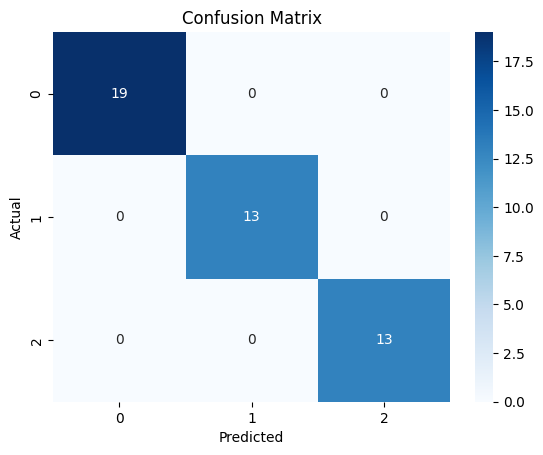

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix'); plt.show()


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [47]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)
stack.fit(X_train, y_train)
print("Stacking accuracy:", round(accuracy_score(y_test, stack.predict(X_test)), 4))


Stacking accuracy: 0.963


37. Train a Random Forest Classifier and print the top 5 most important features

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

imp = rf.feature_importances_
top5 = np.argsort(imp)[-5:][::-1]
print("Top 5 features:")
for i in top5:
    print(f"{data.feature_names[i]} : {imp[i]:.4f}")


Top 5 features:
worst perimeter : 0.1433
worst area : 0.1281
worst concave points : 0.1191
mean concave points : 0.1022
worst radius : 0.0762


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
bag.fit(X_train, y_train)
print(classification_report(y_test, bag.predict(X_test), digits=4))


              precision    recall  f1-score   support

           0     0.9516    0.9365    0.9440        63
           1     0.9633    0.9722    0.9677       108

    accuracy                         0.9591       171
   macro avg     0.9575    0.9544    0.9559       171
weighted avg     0.9590    0.9591    0.9590       171



39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

In [50]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in [None, 3, 5, 10, 20]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    print(f"max_depth={depth} -> acc: {accuracy_score(y_test, rf.predict(X_test)):.4f}")


max_depth=None -> acc: 1.0000
max_depth=3 -> acc: 1.0000
max_depth=5 -> acc: 1.0000
max_depth=10 -> acc: 1.0000
max_depth=20 -> acc: 1.0000


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance

In [51]:
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for estimator in [DecisionTreeRegressor(random_state=42), KNeighborsRegressor()]:
    bag = BaggingRegressor(estimator=estimator, n_estimators=40, random_state=42)
    bag.fit(X_train, y_train)
    print(f"{estimator.__class__.__name__} Bagging MSE:", mean_squared_error(y_test, bag.predict(X_test)))


DecisionTreeRegressor Bagging MSE: 7515.853764551843
KNeighborsRegressor Bagging MSE: 14350.600322858254


41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC:", round(roc_auc_score(y_test, probs), 4))


ROC-AUC: 0.9972


42. Train a Bagging Classifier and evaluate its performance using cross-validatio.

In [53]:
from sklearn.datasets import load_wine
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

data = load_wine()
X, y = data.data, data.target

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("CV accuracies:", scores)
print("CV mean accuracy:", scores.mean())


CV accuracies: [0.94444444 0.88888889 0.97222222 0.97142857 1.        ]
CV mean accuracy: 0.9553968253968254


 43. Train a Random Forest Classifier and plot the Precision-Recall curv

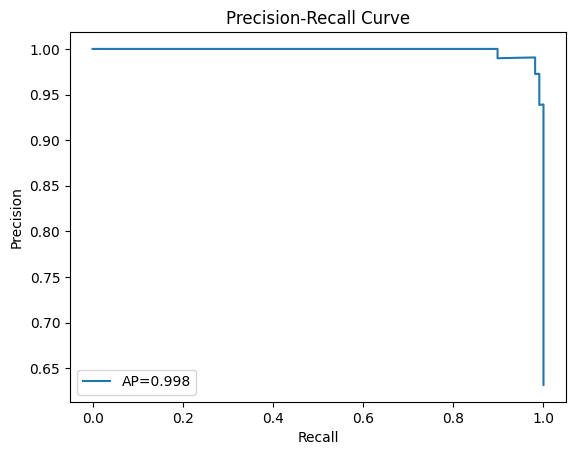

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, probs)
ap = average_precision_score(y_test, probs)
plt.plot(recall, precision, label=f'AP={ap:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve'); plt.legend(); plt.show()


 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [55]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators = [('rf', RandomForestClassifier(n_estimators=50, random_state=42))]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1)
stack.fit(X_train, y_train)
print("Stacking accuracy:", round(accuracy_score(y_test, stack.predict(X_test)), 4))


Stacking accuracy: 1.0


 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance

In [56]:
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=800, n_features=15, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for max_samples in [0.5, 0.7, 1.0]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=50,
                           max_samples=max_samples, random_state=42)
    bag.fit(X_train, y_train)
    print(f"max_samples={max_samples} -> MSE: {mean_squared_error(y_test, bag.predict(X_test)):.4f}")


max_samples=0.5 -> MSE: 6867.9262
max_samples=0.7 -> MSE: 7062.2823
max_samples=1.0 -> MSE: 6401.7939
